In [1]:
pip install pandas scikit-learn matplotlib seaborn xgboost


Note: you may need to restart the kernel to use updated packages.


✅ Dataset Loaded. Shape: (506, 14)

Missing Values:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


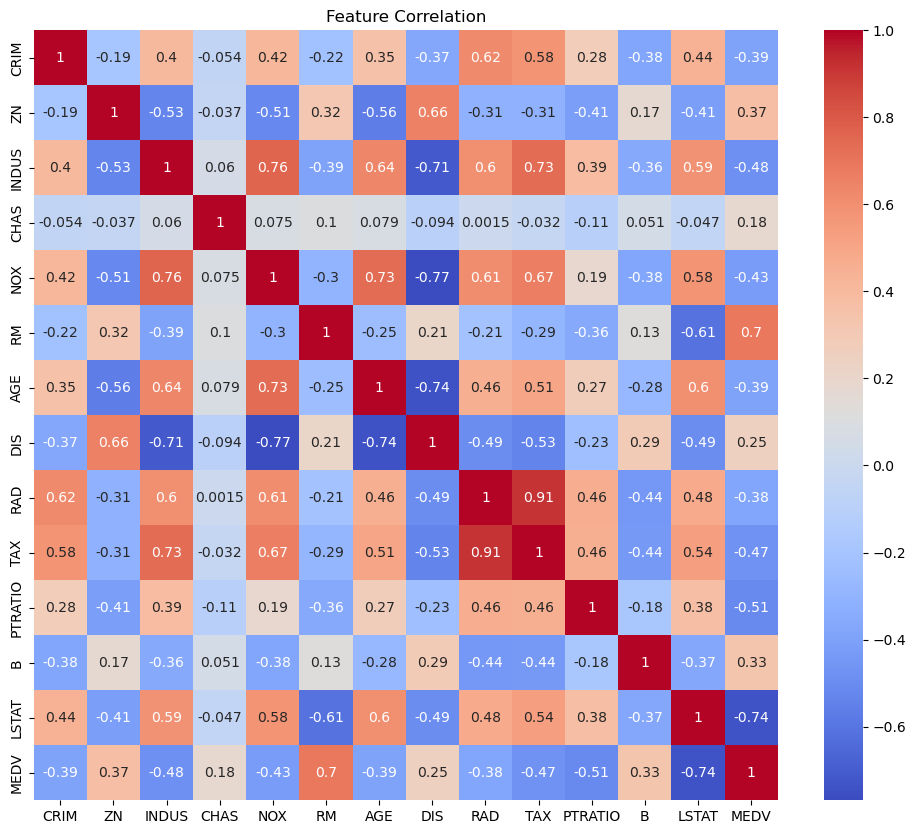

Fitting 5 folds for each of 36 candidates, totalling 180 fits

✅ Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.7}

📈 Cross-Validation R2 Score: 0.668 ± 0.138

📊 Final Evaluation on Test Set:
Mean Squared Error: 4.85
R² Score: 0.934


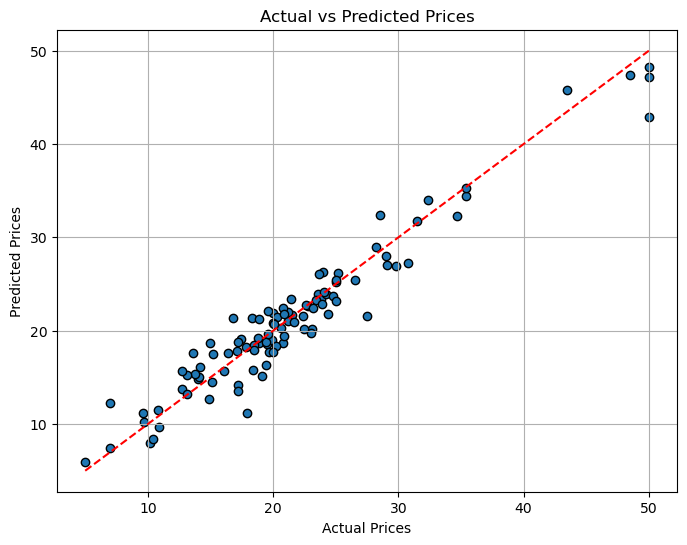

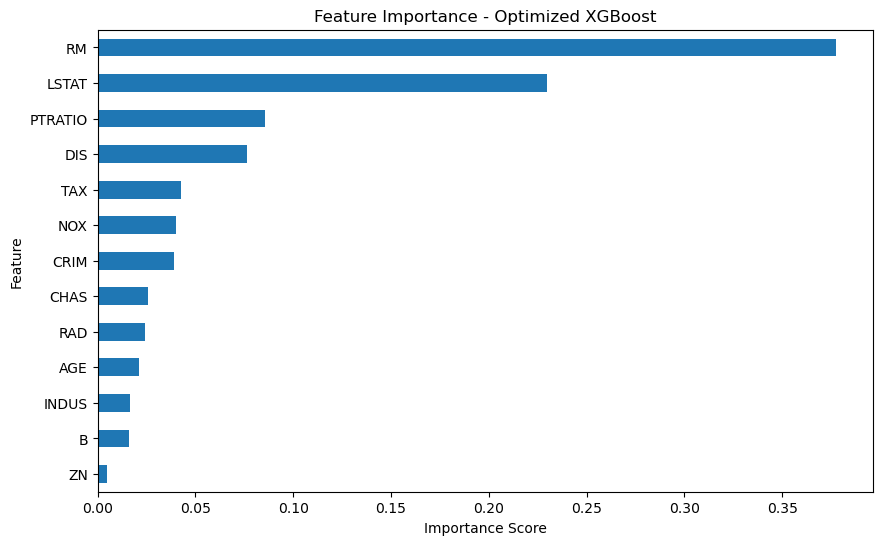

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor

df = pd.read_csv("HousingData.csv")
print("✅ Dataset Loaded. Shape:", df.shape)

print("\nMissing Values:\n", df.isnull().sum())

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

target = 'MEDV'
X = df.drop(columns=[target])
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 1]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, scoring='r2', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("\n✅ Best Hyperparameters:", grid_search.best_params_)

cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='r2')
print(f"\n📈 Cross-Validation R2 Score: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Final Evaluation on Test Set:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

importance = pd.Series(best_model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importance - Optimized XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
